# FRED

## Table of Contents

* [Getting Started - Load Libraries and Dataset](#0)    
* [Using Pandas DataReader](#1)
* [Multiple Tickers](#2)
* [Layoffs](#3)
* [Market Cap Indices](#4)
* [Sentiment](#5)
* [Financial Conditions Index](#6)
* [Foreign Exchange](#7)
* [Cryptocurrencies](#8)
* [Mutual Funds](#9)


<a id='0'></a>
## Getting Started - Load Libraries and Dataset

Categories found at: https://fred.stlouisfed.org/categories


In [3]:
import pandas_datareader as web
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime


In [4]:
start = datetime(2010,1,1)
end = datetime(2030,1,1)

<a id='1'></a>
## Using Pandas DataReader

In [5]:
SP500 = web.DataReader('SP500','fred',start,end)

I'm going to use the seaborn library because the charts look a little nicer by default than using matplotlib.

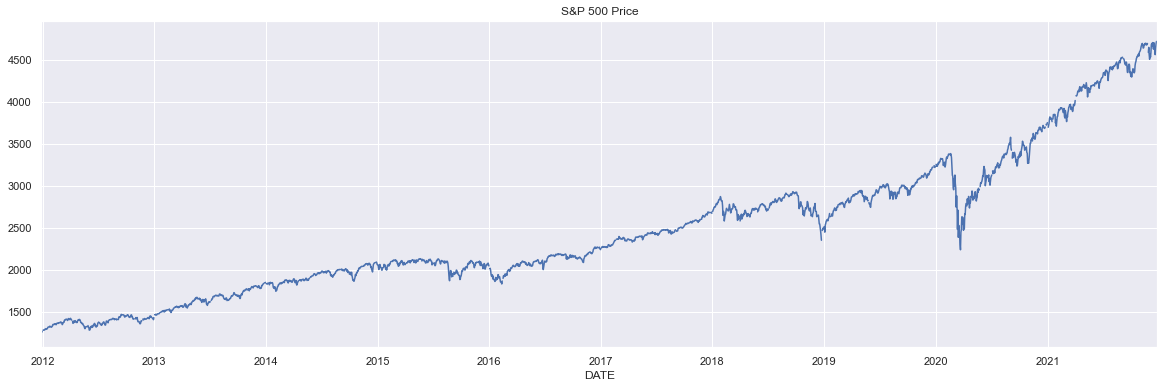

In [6]:
sns.set() #run this to overide matplotlib
SP500['SP500'].plot(title='S&P 500 Price',figsize=(20, 6))

#Use the below to save the chart as an image file
# plt.savefig('s&p500.png')

If you want to calculate the daily change from yesterday's close, you will need to have the previous day's numbers on the same row as the current days. To do that, you have to create a new column where the rows are all shifted up by one. This code creates a new column that does the following:

In [7]:
#This code moves rows up one to have yesterdays close and the current days close in the same row. Than takes the difference to calculate a percent chagne
SP500['daily_return'] = (SP500['SP500']/ SP500['SP500'].shift(1)) -1

In [8]:
# This allows you to see all the rows instead of just a preview
pd.set_option('display.max_rows',None)


In [9]:
SP500.sort_index(ascending=False, inplace=True)
print(SP500.head())

              SP500  daily_return
DATE                             
2021-12-27  4791.19           NaN
2021-12-24      NaN           NaN
2021-12-23  4725.79      0.006224
2021-12-22  4696.56      0.010180
2021-12-21  4649.23      0.017778


To plot more than one series on the same chart, simply pass in a list of the data series

<a id='2'></a>
## Multiple Tickers

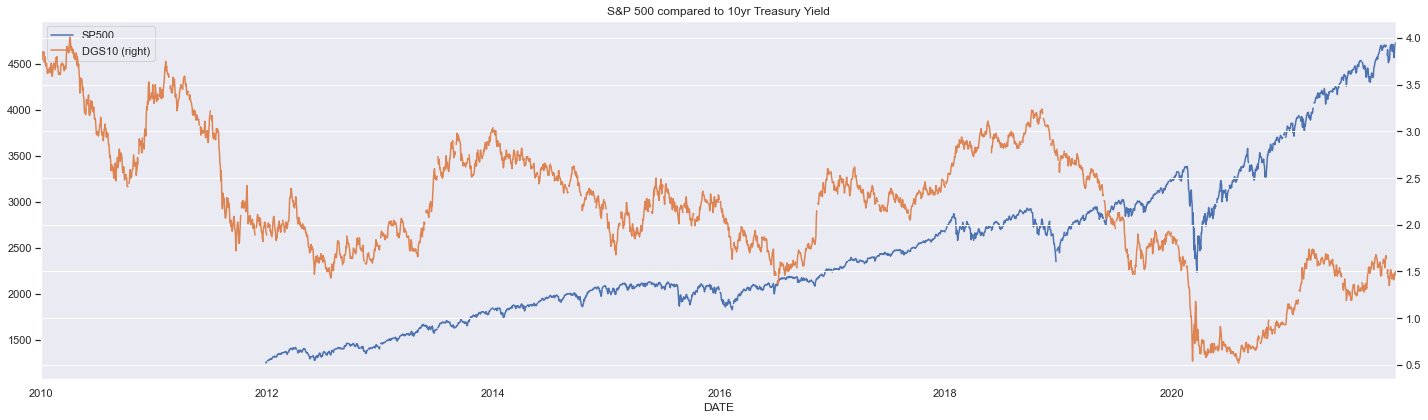

In [10]:
SP500_10yrtreasury = web.DataReader(['SP500',"DGS10"],'fred',start,end)
SP500_10yrtreasury.plot(title = 'S&P 500 compared to 10yr Treasury Yield', secondary_y = "DGS10", figsize=(20, 6))
plt.tight_layout()

# plt.savefig('s&p500and10yr.png')
plt.show()

<a id='3'></a>
## Layoffs

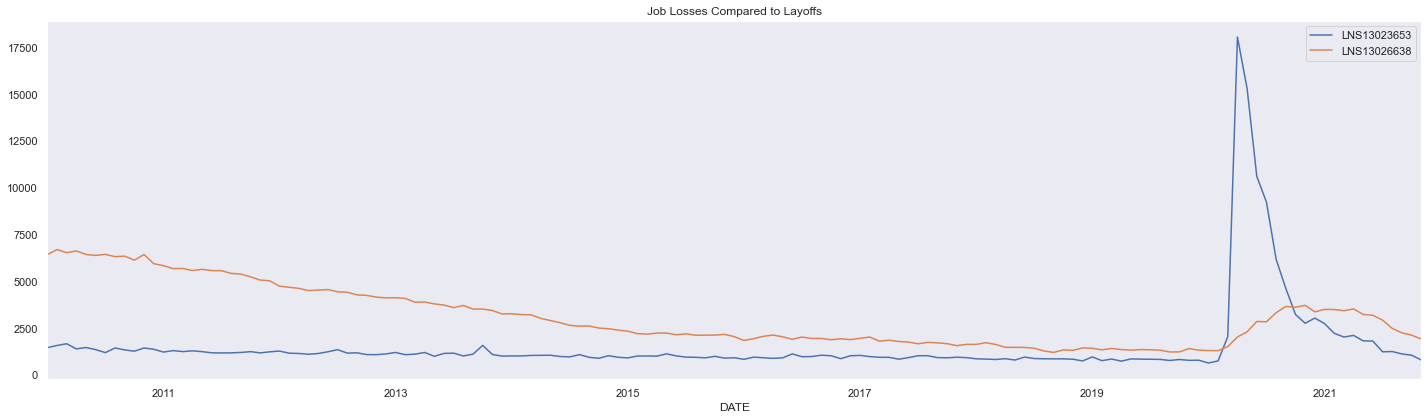

In [21]:
# LNS13023653(blue): Job layoffs, LNS13026638(orange): permenant job loss
job_losses = web.DataReader(['LNS13023653', 'LNS13026638'], 'fred',start,end)
job_losses.plot(title = 'Job Losses Compared to Layoffs', secondary_y = "DGS10", figsize=(20, 6))
plt.tight_layout()

<a id='4'></a>
## Market Cap Indices


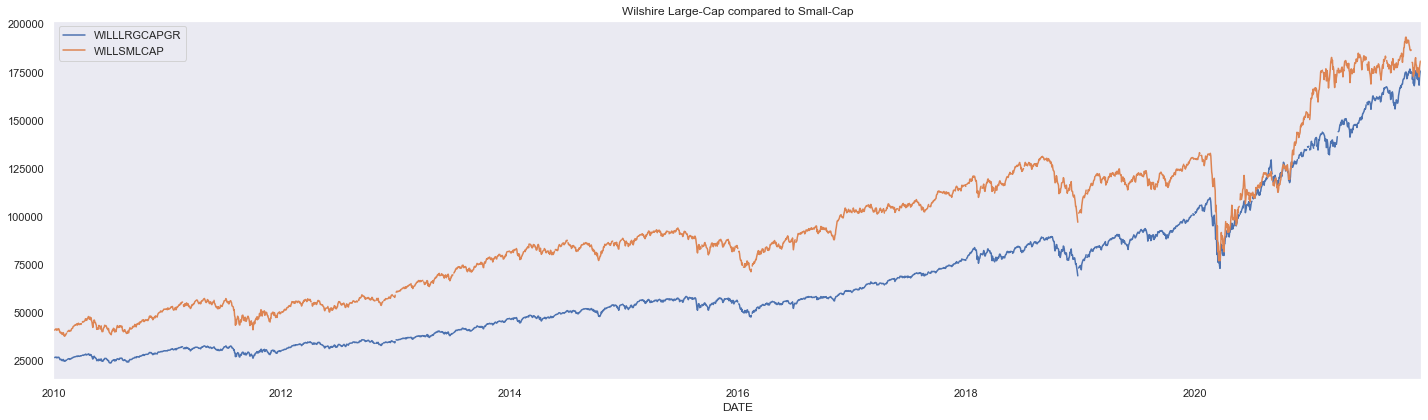

In [31]:
mkt_cap = web.DataReader(['WILLLRGCAPGR', 'WILLSMLCAP'], 'fred',start,end)
mkt_cap.plot(title = 'Wilshire Large-Cap compared to Small-Cap', secondary_y = "DGS10", figsize=(20, 6))
plt.tight_layout()

<a id='5'></a>
## Sentiment

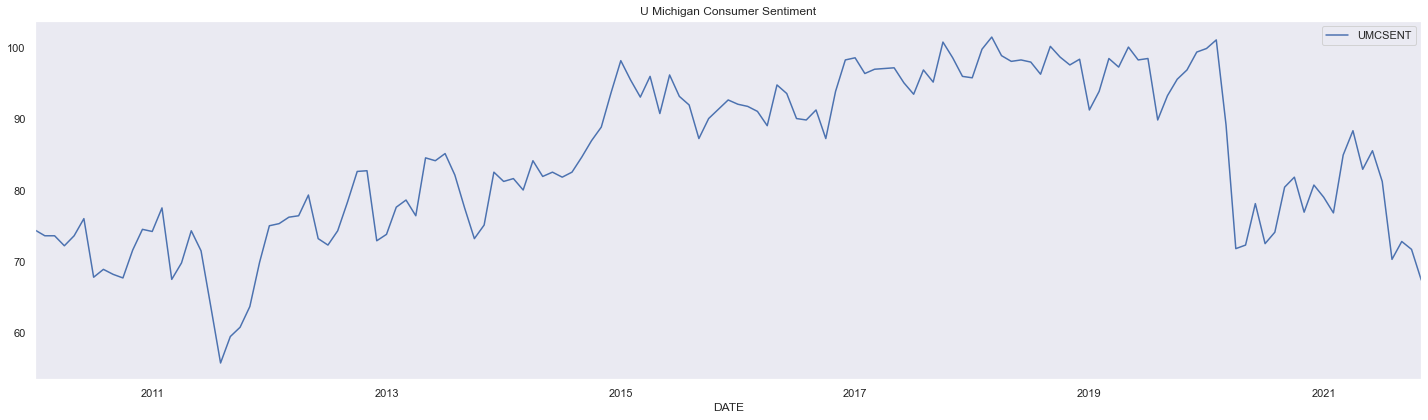

In [33]:
sentiment = web.DataReader('UMCSENT', 'fred',start,end)
sentiment.plot(title = 'U Michigan Consumer Sentiment', secondary_y = "DGS10", figsize=(20, 6))
plt.tight_layout()

<a id='6'></a>
## Financial Conditions Index

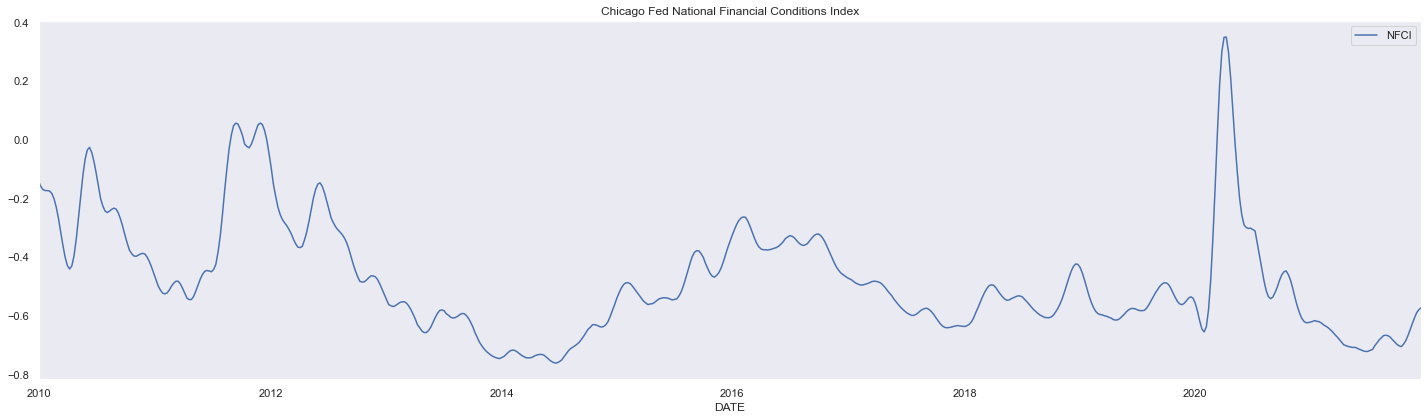

In [34]:
conditions = web.DataReader('NFCI', 'fred',start,end)
conditions.plot(title = 'Chicago Fed National Financial Conditions Index', secondary_y = "DGS10", figsize=(20, 6))
plt.tight_layout()

<a id='7'></a>
## Foreign Exchange

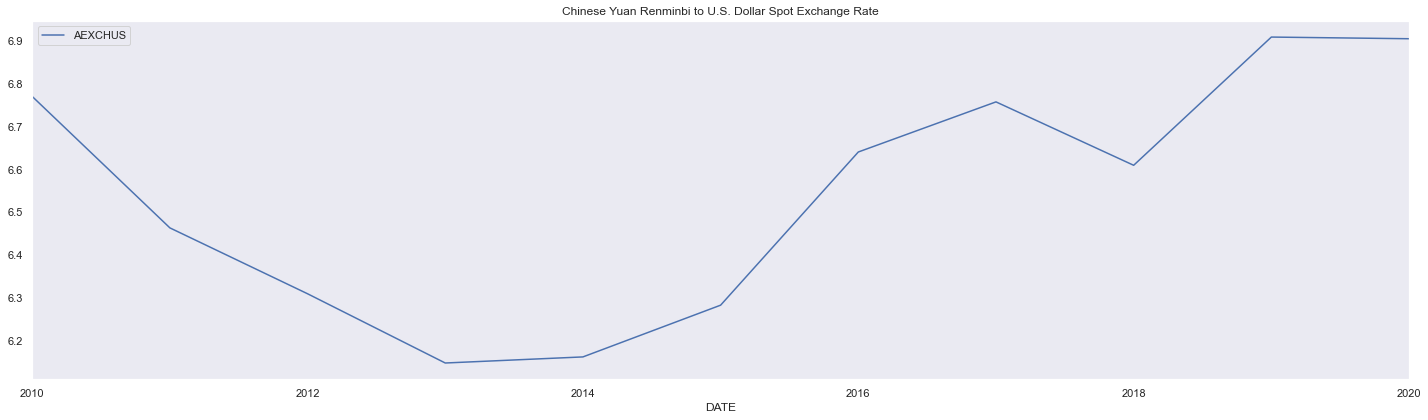

In [39]:
er = web.DataReader('AEXCHUS', 'fred',start,end)
er.plot(title = 'Chinese Yuan Renminbi to U.S. Dollar Spot Exchange Rate', secondary_y = "DGS10", figsize=(20, 6))
plt.tight_layout()

<a id='8'></a>
## Cryptocurrencies

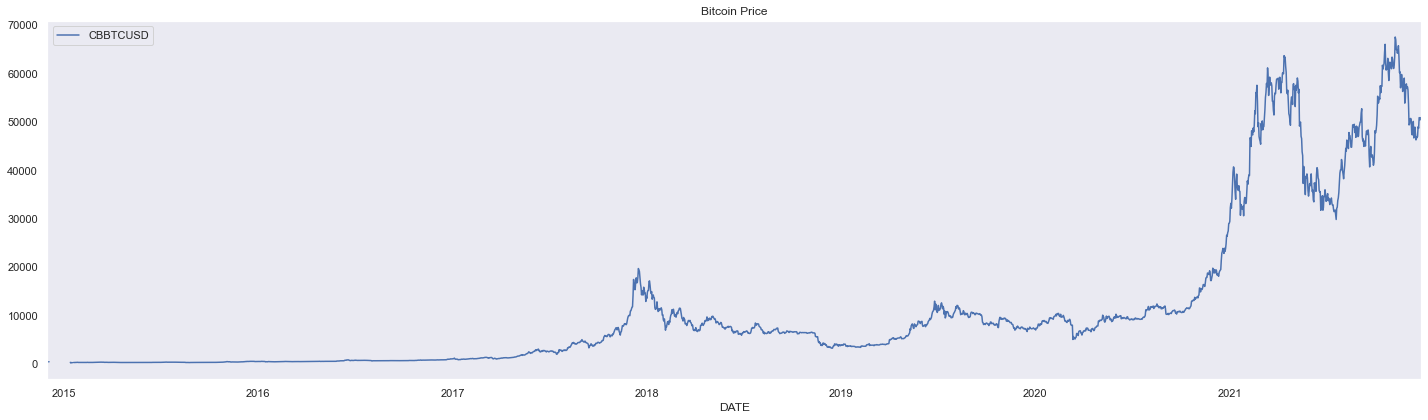

In [40]:
btc = web.DataReader('CBBTCUSD', 'fred',start,end)
btc.plot(title = 'Bitcoin Price', secondary_y = "DGS10", figsize=(20, 6))
plt.tight_layout()

<a id='9'></a>
## Mutual Funds

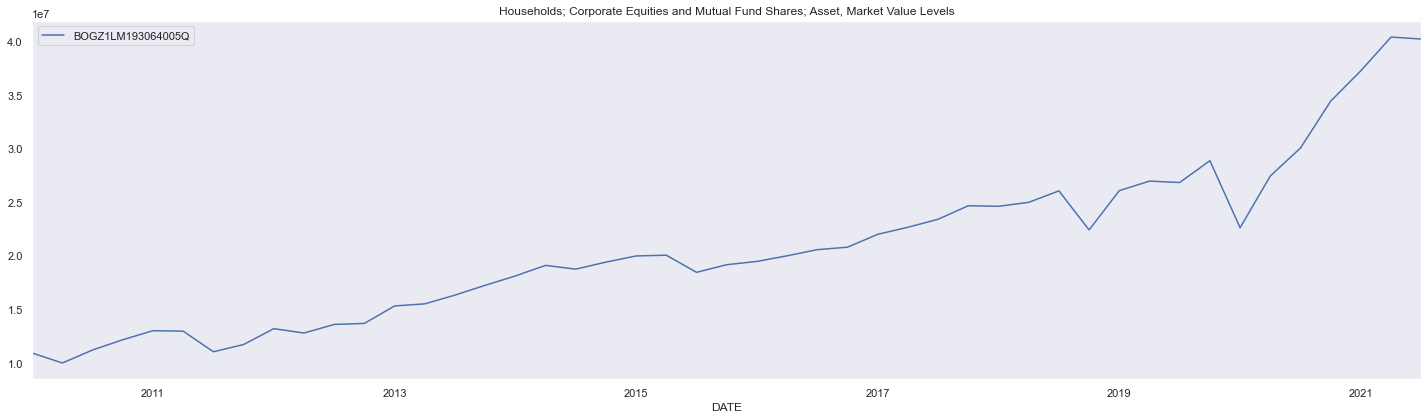

In [41]:
mf = web.DataReader('BOGZ1LM193064005Q', 'fred',start,end)
mf.plot(title = 'Households; Corporate Equities and Mutual Fund Shares; Asset, Market Value Levels', secondary_y = "DGS10", figsize=(20, 6))
plt.tight_layout()

### Treasury Bill

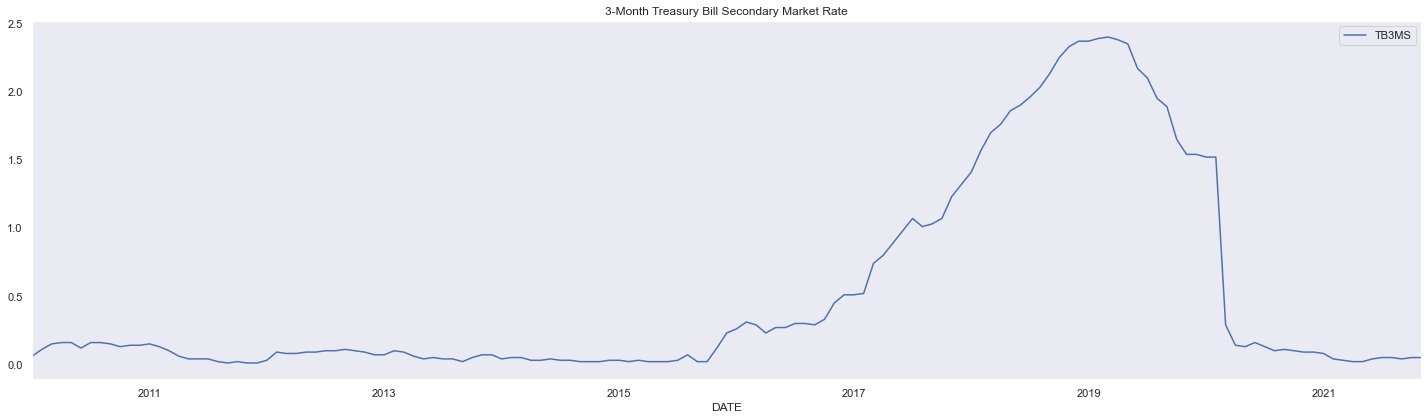

In [42]:
treasury = web.DataReader('TB3MS', 'fred',start,end)
treasury.plot(title = '3-Month Treasury Bill Secondary Market Rate', secondary_y = "DGS10", figsize=(20, 6))
plt.tight_layout()